In [3]:
import seagul.envs
import gym
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import torch

> /home/sgillen/work/seagul/seagul/envs/drake/acrobot.py(51)__init__()
     50 
---> 51         high = np.array([2*pi, pi, 100, 100])
     52         low = np.array([0, -pi, -100, -100])



ipdb>  c


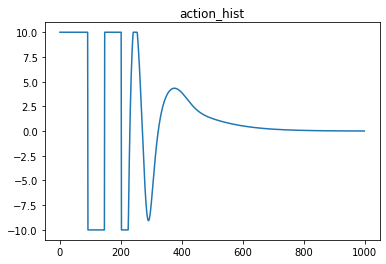

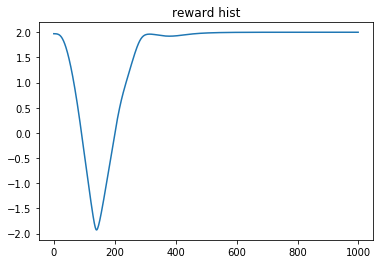

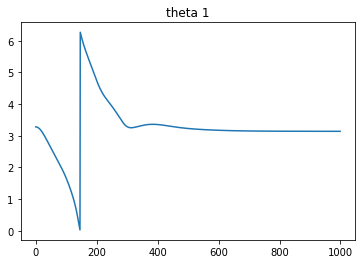

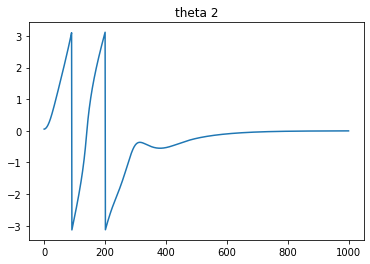

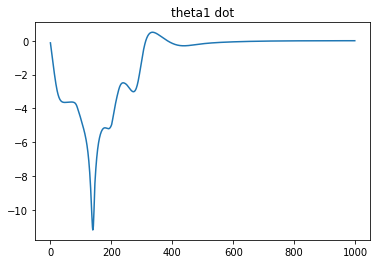

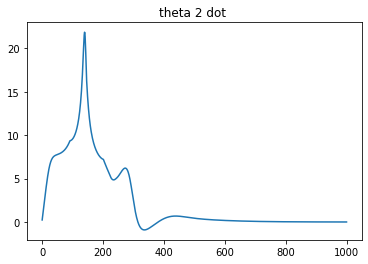

In [4]:
env = gym.make('su_acro_drake-v0')

def control(q):
    k = np.array([[278.44223126, 112.29125985, 119.72457377,  56.82824017]])
    gs = np.array([pi,0,0,0])
    return -k.dot(gs - q)

action_hist = np.zeros((env.num_steps,1))
state_hist = np.zeros((env.num_steps, env.observation_space.shape[0]))
reward_hist = np.zeros((env.num_steps, 1))
obs = env.reset()


for i in range(env.num_steps):
        actions = control(obs)
        obs, reward, done, _ = env.step(np.asarray(actions))
        action_hist[i,:] = np.copy(np.clip(actions, -10, 10))
        state_hist[i,:] = np.copy(obs)
        reward_hist[i,:] = np.copy(reward)
        if done:
            break

plt.plot(action_hist)
plt.title('action_hist')

plt.figure()
plt.plot(reward_hist)
plt.title('reward hist')

plt.figure()
plt.plot(state_hist[:,0])
plt.title("theta 1")

plt.figure()
plt.plot(state_hist[:,1])
plt.title("theta 2")


plt.figure()
plt.plot(state_hist[:,2])
plt.title("theta1 dot")


plt.figure()
plt.plot(state_hist[:,3])
plt.title("theta 2 dot ")


ns,reward,done,_ = env.step(0)